In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')


## Task 1

In [10]:

    customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
    transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
    
    merged_df = transactions_df.merge(customers_df, on='CustomerID')\
                             .merge(products_df, on='ProductID')

In [12]:
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


In [34]:
merged_df.shape

(1000, 13)

In [38]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB


In [42]:
merged_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [44]:
merged_df.describe()

,TransactionDate,Quantity,TotalValue,Price_x,SignupDate,Price_y
count,1000,1000.000000,1000.000000,1000.00000,1000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023-07-09 02:49:55.199999744,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2022-01-22 00:00:00,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2022-09-17 12:00:00,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2023-07-23 00:00:00,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024-04-12 00:00:00,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024-12-28 00:00:00,497.76000
std,NaN,1.117981,493.144478,140.73639,NaN,140.73639


In [46]:
merged_df.corr(numeric_only = True)

,Quantity,TotalValue,Price_x,Price_y
Quantity,1.000000,0.609972,-0.009378,-0.009378
TotalValue,0.609972,1.000000,0.722714,0.722714
Price_x,-0.009378,0.722714,1.000000,1.000000
Price_y,-0.009378,0.722714,1.000000,1.000000


In [16]:
customer_purchase_freq = merged_df.groupby('CustomerID').size()\
                                    .describe()
    
customer_total_spend = merged_df.groupby('CustomerID')['TotalValue']\
                                  .sum().describe()
    
region_analysis = merged_df.groupby('Region')\
                             .agg({
                                 'TransactionID': 'count',
                                 'TotalValue': 'sum'
                             }).reset_index()

In [18]:
product_performance = merged_df.groupby('Category')\
                                 .agg({
                                     'TransactionID': 'count',
                                     'TotalValue': 'sum',
                                     'Quantity': 'sum'
                                 }).reset_index()

In [20]:
monthly_sales = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))\
                           .agg({
                               'TotalValue': 'sum',
                               'TransactionID': 'count'
                           })

In [22]:
customer_lifetime = merged_df.groupby('CustomerID').agg({
        'TotalValue': 'sum',
        'TransactionID': 'count',
        'TransactionDate': lambda x: (x.max() - x.min()).days
    }).reset_index()
    

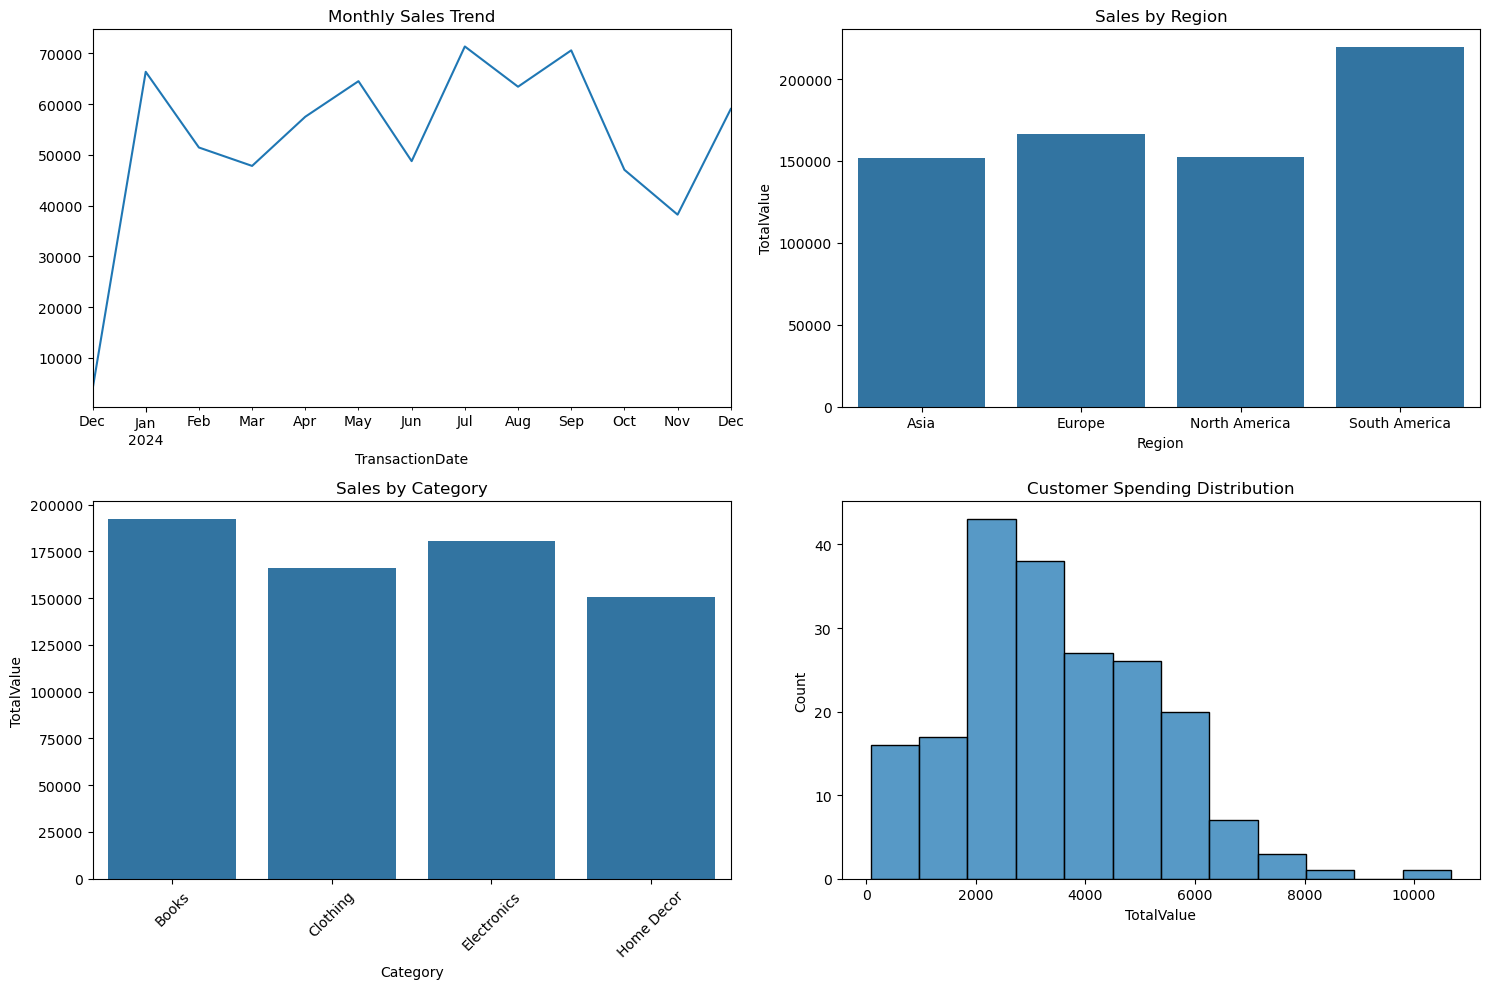

In [32]:
plt.figure(figsize=(15, 10))
    
    # Plot 1: Monthly Sales Trend
plt.subplot(2, 2, 1)
monthly_sales['TotalValue'].plot()
plt.title('Monthly Sales Trend')
    
    # Plot 2: Region-wise Sales
plt.subplot(2, 2, 2)
sns.barplot(data=region_analysis, x='Region', y='TotalValue')
plt.title('Sales by Region')
    
    # Plot 3: Category Performance
plt.subplot(2, 2, 3)
sns.barplot(data=product_performance, x='Category', y='TotalValue')
plt.xticks(rotation=45)
plt.title('Sales by Category')
    
    # Plot 4: Customer Purchase Distribution
plt.subplot(2, 2, 4)
sns.histplot(customer_lifetime['TotalValue'])
plt.title('Customer Spending Distribution')
    
plt.tight_layout()
plt.show()
    

In [58]:
customer_lifetime

,CustomerID,TotalValue,TransactionID,TransactionDate
0,C0001,3354.52,5,288
1,C0002,1862.74,4,278
2,C0003,2725.38,4,188
3,C0004,5354.88,8,299
4,C0005,2034.24,3,233
...,...,...,...,...
194,C0196,4982.88,4,130
195,C0197,1928.65,3,349
196,C0198,931.83,2,5
197,C0199,1979.28,4,69


In [56]:
customer_purchase_freq,
        

(count    199.000000
 mean       5.025126
 std        2.198340
 min        1.000000
 25%        3.000000
 50%        5.000000
 75%        6.000000
 max       11.000000
 dtype: float64,)

<Figure size 1500x800 with 0 Axes>

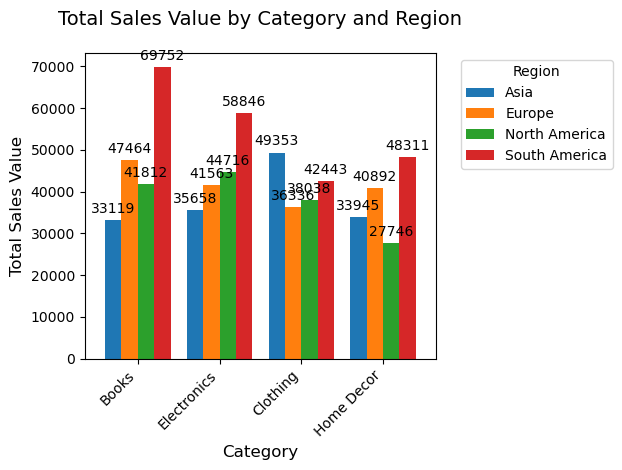


Total Sales by Category and Region:
Region           Asia    Europe  North America  South America
Category                                                     
Books        33119.03  47464.42       41811.99       69752.03
Electronics  35658.15  41562.60       44716.43       58846.32
Clothing     49353.09  36335.59       38038.49       42443.49
Home Decor   33944.70  40892.02       27746.49       48310.72

Percentage Contribution by Region:
Region        Asia  Europe  North America  South America
Category                                                
Books        21.78   28.55          27.45          31.80
Electronics  23.45   25.00          29.36          26.83
Clothing     32.45   21.86          24.97          19.35
Home Decor   22.32   24.60          18.22          22.02


In [94]:
category_region_sales = merged_df.pivot_table(
    values='TotalValue',
    index='Category',
    columns='Region',
    aggfunc='sum'
).round(2)


category_total_sales = category_region_sales.sum(axis=1)
category_region_sales = category_region_sales.loc[category_total_sales.sort_values(ascending=False).index]


plt.figure(figsize=(15, 8))

# Create bar plot
ax = category_region_sales.plot(kind='bar', width=0.8)


plt.title('Total Sales Value by Category and Region', pad=20, size=14)
plt.xlabel('Category', size=12)
plt.ylabel('Total Sales Value', size=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')


for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', rotation=0, padding=3)


plt.tight_layout()


plt.show()


print("\nTotal Sales by Category and Region:")
print(category_region_sales)

print("\nPercentage Contribution by Region:")
percentage_contribution = (category_region_sales.div(category_region_sales.sum()) * 100).round(2)
print(percentage_contribution)

In [90]:
merged_df.sample(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
10,T00727,C0051,P067,2024-01-20 04:52:14,3,902.04,300.68,Nicholas Ellis,Europe,2023-12-21,ComfortLiving Bluetooth Speaker,Electronics,300.68
88,T00228,C0113,P069,2024-04-21 19:52:01,2,201.62,100.81,Joseph Ortiz Jr.,South America,2022-06-17,BookWorld Biography,Books,100.81
198,T00785,C0159,P038,2024-03-26 00:51:36,1,147.22,147.22,Austin Miller,Asia,2022-08-06,TechPro Vase,Home Decor,147.22
470,T00674,C0024,P059,2024-04-14 01:19:59,3,909.60,303.20,Michele Cooley,North America,2024-02-05,SoundWave Jeans,Clothing,303.20
721,T00168,C0023,P083,2024-09-26 17:22:30,3,1367.16,455.72,Nicholas Cain,Europe,2022-03-04,ActiveWear Smartwatch,Electronics,455.72
719,T00133,C0194,P083,2024-09-26 23:48:07,3,1367.16,455.72,Stacy Cook,North America,2024-05-04,ActiveWear Smartwatch,Electronics,455.72
843,T00706,C0181,P002,2024-07-01 00:11:31,3,1038.90,346.30,Alexander Barker,South America,2023-11-16,ActiveWear Smartwatch,Electronics,346.30
932,T00219,C0019,P008,2024-08-22 23:44:44,1,146.85,146.85,Brandon Rodriguez,Europe,2023-01-12,BookWorld Bluetooth Speaker,Electronics,146.85
410,T00198,C0048,P039,2024-09-17 07:53:30,1,430.59,430.59,Matthew Park,South America,2024-11-07,TechPro Smartwatch,Electronics,430.59
657,T00629,C0100,P093,2024-04-06 10:30:48,1,304.94,304.94,Clinton Gomez,Europe,2023-03-16,TechPro Vase,Home Decor,304.94


In [104]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])


merged_df['Month-Year'] = merged_df['TransactionDate'].dt.to_period('M')

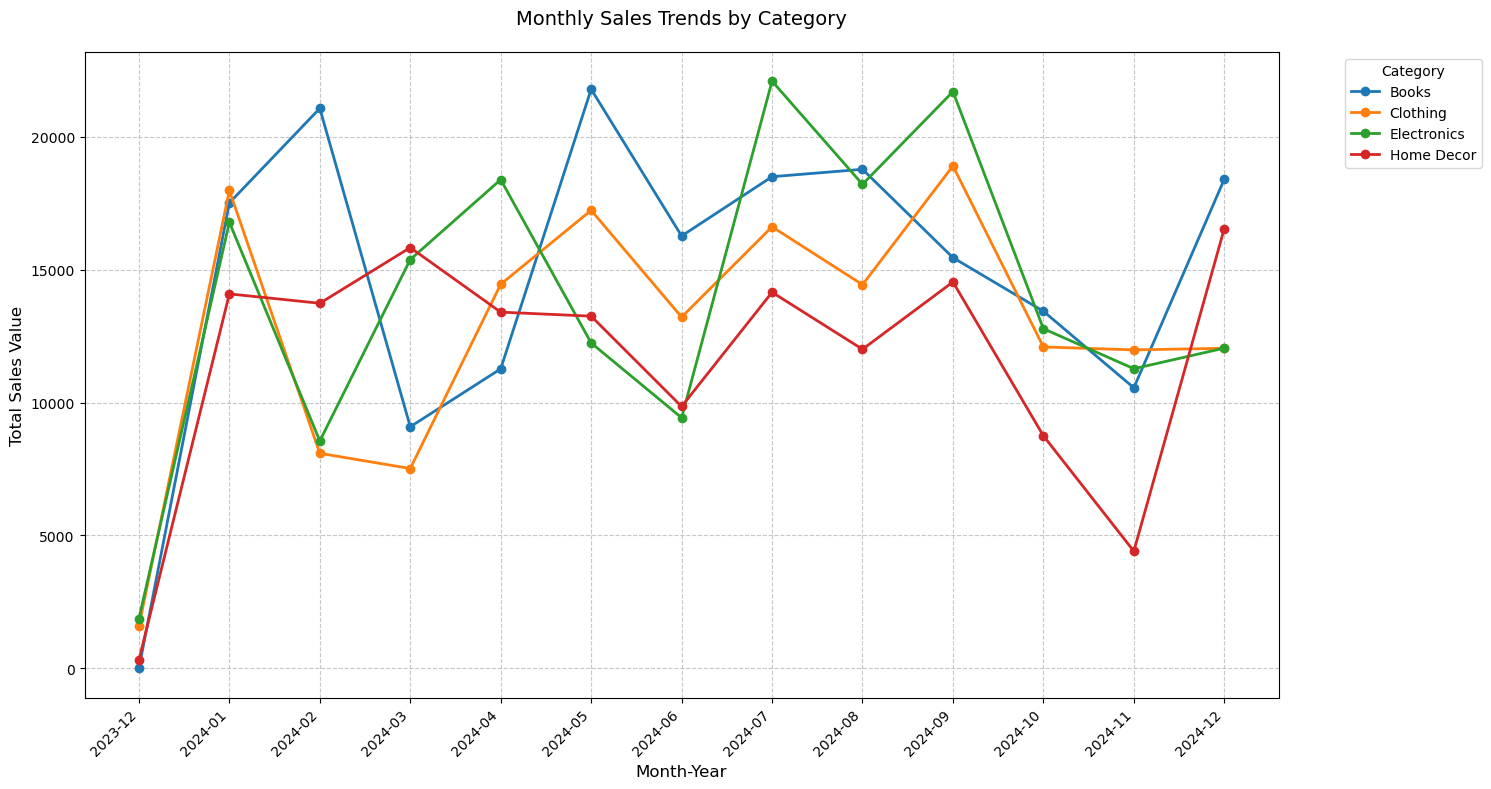


Summary Statistics by Category:
Category     Books  Clothing  Electronics  Home Decor
mean      14780.57  12782.36     13906.42    11607.23
min           0.00   1585.36      1870.24      313.92
max       21793.32  18906.19     22096.51    16549.64
std        5949.01   4843.76      5663.73     4697.29

Month-over-Month Growth Rates:

Average Monthly Growth Rate by Category:
Category
Books             inf
Clothing        88.97
Electronics     73.44
Home Decor     382.90
dtype: float64

Peak Sales Months by Category:
Books: 2024-05 ($21,793.32)
Clothing: 2024-09 ($18,906.19)
Electronics: 2024-07 ($22,096.51)
Home Decor: 2024-12 ($16,549.64)


In [110]:
monthly_category_sales = merged_df.pivot_table(
    values='TotalValue',
    index='Month-Year',
    columns='Category',
    aggfunc='sum'
).fillna(0)

monthly_category_sales.index = monthly_category_sales.index.astype(str)
monthly_category_sales = monthly_category_sales.sort_index()

plt.figure(figsize=(15, 8))

for category in monthly_category_sales.columns:
    plt.plot(monthly_category_sales.index, 
            monthly_category_sales[category], 
            marker='o', 
            label=category,
            linewidth=2,
            markersize=6)

plt.title('Monthly Sales Trends by Category', pad=20, size=14)
plt.xlabel('Month-Year', size=12)
plt.ylabel('Total Sales Value', size=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

print("\nSummary Statistics by Category:")
summary_stats = monthly_category_sales.agg(['mean', 'min', 'max', 'std']).round(2)
print(summary_stats)

print("\nMonth-over-Month Growth Rates:")
growth_rates = monthly_category_sales.pct_change() * 100
average_growth = growth_rates.mean().round(2)
print("\nAverage Monthly Growth Rate by Category:")
print(average_growth)

print("\nPeak Sales Months by Category:")
for category in monthly_category_sales.columns:
    peak_month = monthly_category_sales[category].idxmax()
    peak_value = monthly_category_sales[category].max()
    print(f"{category}: {peak_month} (${peak_value:,.2f})")

## Task 2

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

def create_customer_features(customers_df, transactions_df, products_df):
   
    customers_df = customers_df.copy()
    transactions_df = transactions_df.copy()
    products_df = products_df.copy()
    
    #handle NaN
    customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], errors='coerce')
    transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors='coerce')
    
    
    customers_df = customers_df.dropna(subset=['CustomerID', 'SignupDate'])
    transactions_df = transactions_df.dropna(subset=['TransactionID', 'CustomerID', 'ProductID'])
    products_df = products_df.dropna(subset=['ProductID'])
    
   
    transactions_df['TotalValue'] = pd.to_numeric(transactions_df['TotalValue'], errors='coerce').fillna(0)
    transactions_df['Quantity'] = pd.to_numeric(transactions_df['Quantity'], errors='coerce').fillna(0)
    transactions_df['Price'] = pd.to_numeric(transactions_df['Price'], errors='coerce').fillna(0)
    
    # 1. Basic customer features
    customer_features = customers_df.copy()
    customer_features['account_age'] = (pd.Timestamp.now() - customer_features['SignupDate']).dt.days
    
    # 2. Transaction-based features
    customer_transactions = transactions_df.groupby('CustomerID').agg({
        'TransactionID': 'count',
        'TotalValue': ['sum', 'mean', 'std'],
        'Quantity': ['sum', 'mean', 'std']
    }).reset_index()
    
    
    customer_transactions.columns = ['CustomerID', 'transaction_count', 
                                   'total_spend', 'avg_transaction_value', 'std_transaction_value',
                                   'total_quantity', 'avg_quantity', 'std_quantity']
    
    
    customer_transactions = customer_transactions.fillna(0)
    
   
    category_preferences = transactions_df.merge(products_df, on='ProductID')\
        .groupby(['CustomerID', 'Category'])['TotalValue'].sum().unstack(fill_value=0)
    
    
    customer_matrix = customer_features.merge(customer_transactions, on='CustomerID', how='left')\
        .merge(category_preferences, on='CustomerID', how='left')
    
    
    customer_matrix = customer_matrix.fillna(0)
    
    
    customer_matrix = customer_matrix.drop(['CustomerName', 'SignupDate'], axis=1)
    
    
    customer_matrix = pd.get_dummies(customer_matrix, columns=['Region'])
    
    return customer_matrix



In [66]:
def find_lookalikes(customer_matrix, target_customer_id, n_recommendations=3):
    try:
        
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(customer_matrix.drop('CustomerID', axis=1))
        
        # Calculate similarity scores
        similarity_matrix = cosine_similarity(features_scaled)
        
        
        target_idx = customer_matrix[customer_matrix['CustomerID'] == target_customer_id].index[0]
        
        # Get similarity scores for target customer
        similarity_scores = similarity_matrix[target_idx]
        
       
        similar_indices = np.argsort(similarity_scores)[::-1][1:n_recommendations+1]
        
        # Create recommendations dataframe
        recommendations = pd.DataFrame({
            'similar_customer_id': customer_matrix.iloc[similar_indices]['CustomerID'].values,
            'similarity_score': similarity_scores[similar_indices]
        })
        
        return recommendations
    
    except Exception as e:
        print(f"Error processing customer {target_customer_id}: {str(e)}")
        return pd.DataFrame(columns=['similar_customer_id', 'similarity_score'])


In [68]:
def generate_lookalike_recommendations(customers_df, transactions_df, products_df, start_id=1, end_id=20):
    try:
        # Create customer feature matrix
        customer_matrix = create_customer_features(customers_df, transactions_df, products_df)
        
        # Print shape of feature matrix
        print(f"Feature matrix shape: {customer_matrix.shape}")
        
        # Generate recommendations for specified range of customers
        recommendations_dict = {}
        
        for i in range(start_id, end_id + 1):
            customer_id = f'C{str(i).zfill(4)}'
            if customer_id in customer_matrix['CustomerID'].values:
                recommendations = find_lookalikes(customer_matrix, customer_id)
                if not recommendations.empty:
                    recommendations_dict[customer_id] = recommendations.to_dict('records')
            else:
                print(f"Customer {customer_id} not found in the dataset")
        
        # Create output DataFrame
        output_df = pd.DataFrame({
            'CustomerID': list(recommendations_dict.keys()),
            'Lookalikes': [str(v) for v in recommendations_dict.values()]
        })
        
        # Save to CSV
        output_df.to_csv('FirstName_LastName_Lookalike.csv', index=False)
        
        return recommendations_dict
    
    except Exception as e:
        print(f"Error generating recommendations: {str(e)}")
        return {}

In [70]:
lookalikes = generate_lookalike_recommendations(customers_df, transactions_df, products_df)

Feature matrix shape: (200, 17)


In [72]:
def format_recommendations(recommendations_dict):
    """
    Format recommendations as required: Map<cust_id, List<cust_id, score>>
    """
    formatted_results = {}
    for cust_id, recs in recommendations_dict.items():
        # Format each recommendation as [customer_id, score]
        formatted_recs = [[rec['similar_customer_id'], round(rec['similarity_score'], 4)] 
                         for rec in recs]
        formatted_results[cust_id] = formatted_recs
    return formatted_results

In [74]:
def save_recommendations(formatted_results, filename='FirstName_LastName_Lookalike.csv'):
    """
    Save recommendations in the required format
    """
    # Convert to DataFrame
    results_df = pd.DataFrame({
        'CustomerID': list(formatted_results.keys()),
        'Recommendations': [str(v) for v in formatted_results.values()]
    })
    
    # Save to CSV
    results_df.to_csv(filename, index=False)
    
    # Print first few results for verification
    print("\nFirst few recommendations:")
    for cust_id, recs in list(formatted_results.items())[:5]:
        print(f"\nCustomer {cust_id}:")
        for rec in recs:
            print(f"Similar customer: {rec[0]}, Similarity score: {rec[1]}")

In [76]:
try:
    # 1. Create feature matrix
    print("Creating customer feature matrix...")
    customer_matrix = create_customer_features(customers_df, transactions_df, products_df)
    print(f"Feature matrix shape: {customer_matrix.shape}")
    
    # 2. Generate recommendations for first 20 customers
    print("\nGenerating recommendations...")
    recommendations_dict = {}
    
    for i in range(1, 21):  # For customers C0001 to C0020
        customer_id = f'C{str(i).zfill(4)}'
        if customer_id in customer_matrix['CustomerID'].values:
            recommendations = find_lookalikes(customer_matrix, customer_id)
            if not recommendations.empty:
                recommendations_dict[customer_id] = recommendations.to_dict('records')
            print(f"Generated recommendations for {customer_id}")
        else:
            print(f"Warning: Customer {customer_id} not found in dataset")
    
    # 3. Format recommendations
    print("\nFormatting recommendations...")
    formatted_results = format_recommendations(recommendations_dict)
    
    # 4. Save results
    print("\nSaving results...")
    save_recommendations(formatted_results)
    
    print("\nProcess completed successfully!")
    
    # 5. Display sample of results
    print("\nSample of similarity scores:")
    sample_customer = list(formatted_results.keys())[0]
    print(f"\nFor customer {sample_customer}:")
    for rec in formatted_results[sample_customer]:
        print(f"Similar customer: {rec[0]}, Similarity score: {rec[1]}")

except Exception as e:
    print(f"Error in processing: {str(e)}")

Creating customer feature matrix...
Feature matrix shape: (200, 17)

Generating recommendations...
Generated recommendations for C0001
Generated recommendations for C0002
Generated recommendations for C0003
Generated recommendations for C0004
Generated recommendations for C0005
Generated recommendations for C0006
Generated recommendations for C0007
Generated recommendations for C0008
Generated recommendations for C0009
Generated recommendations for C0010
Generated recommendations for C0011
Generated recommendations for C0012
Generated recommendations for C0013
Generated recommendations for C0014
Generated recommendations for C0015
Generated recommendations for C0016
Generated recommendations for C0017
Generated recommendations for C0018
Generated recommendations for C0019
Generated recommendations for C0020

Formatting recommendations...

Saving results...

First few recommendations:

Customer C0001:
Similar customer: C0091, Similarity score: 0.7206
Similar customer: C0184, Similarity 

In [78]:
def evaluate_model_quality(customer_matrix, recommendations_dict, transactions_df):
    
    evaluation_results = {}
    
    # 1. Feature Distribution Analysis
    print("\n1. Feature Distribution Analysis:")
    numeric_features = customer_matrix.select_dtypes(include=[np.number]).columns
    feature_stats = customer_matrix[numeric_features].describe()
    evaluation_results['feature_stats'] = feature_stats
    
    # 2. Similarity Score Distribution
    print("\n2. Similarity Score Distribution:")
    all_scores = []
    for customer_recs in recommendations_dict.values():
        scores = [rec['similarity_score'] for rec in customer_recs]
        all_scores.extend(scores)
    
    score_stats = pd.Series(all_scores).describe()
    print(score_stats)
    evaluation_results['similarity_stats'] = score_stats
    
    # 3. Behavioral Validation
    print("\n3. Behavioral Validation:")
    validation_metrics = validate_recommendations(recommendations_dict, transactions_df)
    evaluation_results['behavioral_validation'] = validation_metrics
    
    # 4. Feature Importance Analysis
    print("\n4. Feature Importance Analysis:")
    feature_importance = analyze_feature_importance(customer_matrix)
    evaluation_results['feature_importance'] = feature_importance
    
    return evaluation_results

In [80]:
def validate_recommendations(recommendations_dict, transactions_df):
    """
    Validate recommendations by comparing purchasing behavior
    """
    validation_metrics = {}
    
    # Group transactions by customer
    customer_behavior = transactions_df.groupby('CustomerID').agg({
        'TotalValue': ['sum', 'mean'],
        'Quantity': ['sum', 'mean'],
        'TransactionID': 'count'
    }).reset_index()
    
    behavior_similarity_scores = []
    
    for customer_id, recs in recommendations_dict.items():
        # Get base customer behavior
        base_customer = customer_behavior[customer_behavior['CustomerID'] == customer_id]
        
        for rec in recs:
            similar_id = rec['similar_customer_id']
            similar_customer = customer_behavior[customer_behavior['CustomerID'] == similar_id]
            
            if not base_customer.empty and not similar_customer.empty:
                # Calculate behavior similarity
                behavior_similarity = calculate_behavior_similarity(
                    base_customer.iloc[0], 
                    similar_customer.iloc[0]
                )
                behavior_similarity_scores.append(behavior_similarity)
    
    validation_metrics['behavior_similarity_mean'] = np.mean(behavior_similarity_scores)
    validation_metrics['behavior_similarity_std'] = np.std(behavior_similarity_scores)
    
    return validation_metrics


In [82]:
def calculate_behavior_similarity(customer1, customer2):
    """
    Calculate similarity between two customers based on their behavior
    """
    # Extract behavioral metrics
    metrics1 = [
        customer1[('TotalValue', 'sum')],
        customer1[('TotalValue', 'mean')],
        customer1[('Quantity', 'sum')],
        customer1[('Quantity', 'mean')],
        customer1[('TransactionID', 'count')]
    ]
    
    metrics2 = [
        customer2[('TotalValue', 'sum')],
        customer2[('TotalValue', 'mean')],
        customer2[('Quantity', 'sum')],
        customer2[('Quantity', 'mean')],
        customer2[('TransactionID', 'count')]
    ]
    
    # Normalize and calculate similarity
    metrics1_norm = np.array(metrics1) / np.linalg.norm(metrics1)
    metrics2_norm = np.array(metrics2) / np.linalg.norm(metrics2)
    
    return np.dot(metrics1_norm, metrics2_norm)


In [84]:
def analyze_feature_importance(customer_matrix):
    """
    Analyze which features contribute most to customer similarity
    """
    # Calculate correlation between features
    numeric_features = customer_matrix.select_dtypes(include=[np.number])
    correlation_matrix = numeric_features.corr()
    
    # Get average correlation for each feature
    feature_importance = correlation_matrix.abs().mean()
    
    return feature_importance.sort_values(ascending=False)


In [86]:
def print_evaluation_summary(evaluation_results):
    """
    Print a human-readable summary of the evaluation results
    """
    print("\nModel Evaluation Summary:")
    print("=" * 50)
    
    # 1. Similarity Score Quality
    print("\n1. Similarity Score Distribution:")
    print(evaluation_results['similarity_stats'])
    
    # 2. Behavioral Validation
    print("\n2. Behavioral Validation Results:")
    print(f"Mean behavior similarity: {evaluation_results['behavioral_validation']['behavior_similarity_mean']:.4f}")
    print(f"Std behavior similarity: {evaluation_results['behavioral_validation']['behavior_similarity_std']:.4f}")
    
    # 3. Top Important Features
    print("\n3. Most Important Features:")
    top_features = evaluation_results['feature_importance'].head(10)
    for feature, importance in top_features.items():
        print(f"{feature}: {importance:.4f}")

In [88]:
try:
    # Assuming customer_matrix and recommendations_dict are already created
    evaluation_results = evaluate_model_quality(customer_matrix, recommendations_dict, transactions_df)
    print_evaluation_summary(evaluation_results)
    
    # Additional validation checks
    print("\nValidation Checks:")
    print("-" * 50)
    
    # Check for self-recommendations
    self_recs = []
    for cust_id, recs in recommendations_dict.items():
        if any(rec['similar_customer_id'] == cust_id for rec in recs):
            self_recs.append(cust_id)
    
    if self_recs:
        print("Warning: Found self-recommendations for customers:", self_recs)
    else:
        print("✓ No self-recommendations found")
    
    # Check similarity score ranges
    invalid_scores = []
    for cust_id, recs in recommendations_dict.items():
        for rec in recs:
            if not (0 <= rec['similarity_score'] <= 1):
                invalid_scores.append((cust_id, rec['similar_customer_id'], rec['similarity_score']))
    
    if invalid_scores:
        print("Warning: Found invalid similarity scores:", invalid_scores)
    else:
        print("✓ All similarity scores are within valid range (0-1)")

except Exception as e:
    print(f"Error in evaluation: {str(e)}")


1. Feature Distribution Analysis:

2. Similarity Score Distribution:
count    60.000000
mean      0.777971
std       0.076928
min       0.601831
25%       0.723525
50%       0.775328
75%       0.832669
max       0.945073
dtype: float64

3. Behavioral Validation:

4. Feature Importance Analysis:

Model Evaluation Summary:

1. Similarity Score Distribution:
count    60.000000
mean      0.777971
std       0.076928
min       0.601831
25%       0.723525
50%       0.775328
75%       0.832669
max       0.945073
dtype: float64

2. Behavioral Validation Results:
Mean behavior similarity: 0.9839
Std behavior similarity: 0.0357

3. Most Important Features:
total_spend: 0.5370
total_quantity: 0.4975
transaction_count: 0.4231
std_transaction_value: 0.3733
avg_transaction_value: 0.3645
Books: 0.3075
avg_quantity: 0.3069
std_quantity: 0.2969
Clothing: 0.2910
Electronics: 0.2807

Validation Checks:
--------------------------------------------------
✓ No self-recommendations found
✓ All similarity sco